<h1>Running with tensorflow</h1>
<body>
    Writing a basic graph
</body>

In [1]:
import tensorflow as tf
import numpy as np

In [19]:
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y+y+2

In [3]:
f

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [17]:
sess = tf.compat.v1.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

RuntimeError: The Session graph is empty. Add operations to the graph before calling run().

In [14]:
def reset_graph(seed=42):
    tf.compat.v1.reset_default_graph()
    tf.compat.v1.set_random_seed(seed)
    np.random.seed(seed)
reset_graph()

In [16]:
tf.compat.v1.disable_eager_execution()

<body>
    Repeating it for a lot of time, a better way of running
</body>

In [20]:
with tf.compat.v1.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [21]:
result

42

In [22]:
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    init.run()
    result = f.eval()

In [23]:
result

42

In [24]:
sess.close()

<h4>Tensorflow programming is divided into 2 parts</h4>
<body>
    1. building the computation, construction phase <br>
    2. runnng the computation, execution phase
</body>

<h3>Managing Graphs</h3>

In [25]:
x1 = tf.Variable(1)
x1.graph is tf.compat.v1.get_default_graph()

True

In [26]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)

In [27]:
x2.graph is graph

True

In [28]:
x2.graph is tf.compat.v1.get_default_graph()

False

<h3>Life cycle of a node value</h3>

In [29]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

In [30]:
with tf.compat.v1.Session() as sess:
    print(x.eval())
    print(y.eval())
    print(z.eval())

5
10
15


In [31]:
with tf.compat.v1.Session() as sess:
    x_val, y_val, z_val = sess.run([x, y, z])
    print(x_val)
    print(y_val)
    print(z_val)

5
10
15


<h3>
    Linear Regression with Tensorflow
</h3>
<body>
    Can take any number of inputs and can produce any number of outputs
</body>

<body>
    inputs and outputs are multiple dimensional arrays also called as tensors <br>
    have type and shape
</body>

In [32]:
import numpy as np
from sklearn.datasets import fetch_california_housing

In [33]:
housing = fetch_california_housing()
m, n = housing.data.shape
print(m, n)

20640 8


In [34]:
housing_data_bias = np.c_[np.ones((m, 1)), housing.data]

In [35]:
housing_data_bias.shape

(20640, 9)

In [36]:
X = tf.constant(housing_data_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

In [37]:
X_trans = tf.transpose(X)

In [38]:
theta = tf.matmul(tf.matmul(tf.compat.v1.matrix_inverse(tf.matmul(X_trans, X)), X_trans), y)

In [39]:
theta

<tf.Tensor 'MatMul_2:0' shape=(9, 1) dtype=float32>

In [40]:
with tf.compat.v1.Session() as sess:
    theta_val = theta.eval()

In [41]:
print(len(theta_val))

9


In [42]:
theta_val

array([[-3.67705498e+01],
       [ 4.37038541e-01],
       [ 9.46600735e-03],
       [-1.07598245e-01],
       [ 6.45409822e-01],
       [-3.89580509e-06],
       [-3.79019836e-03],
       [-4.19535339e-01],
       [-4.32566136e-01]], dtype=float32)

<h4>
    Implementing Gradient Descent
</h4>

In [43]:
n_epochs = 1000
learning_rate = 0.01

In [44]:
X = tf.constant(housing_data_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

In [45]:
theta = tf.Variable(tf.compat.v1.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")

In [46]:
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y

In [47]:
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)

In [48]:
training_op = tf.compat.v1.assign(theta, theta - learning_rate*gradients)

In [49]:
init = tf.compat.v1.global_variables_initializer()

In [50]:
mse_vals = []
with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        mse_vals.append(mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()

Epoch 0 MSE = 49350.047
Epoch 100 MSE = nan
Epoch 200 MSE = nan
Epoch 300 MSE = nan
Epoch 400 MSE = nan
Epoch 500 MSE = nan
Epoch 600 MSE = nan
Epoch 700 MSE = nan
Epoch 800 MSE = nan
Epoch 900 MSE = nan


In [51]:
gradients = tf.gradients(mse, [theta])[0]

In [52]:
gradients.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'gradients/predictions_grad/MatMul_1:0' shape=(9, 1) dtype=float32>>

In [53]:
z_val = []
def funct(a, b):
    z = 0
    for i in range(100):
        z = a * np.cos(z + i) + z * np.sin(b - i)
        z_val.append(z)
    return z

In [54]:
funct(1, 2)

-0.3771593770423273

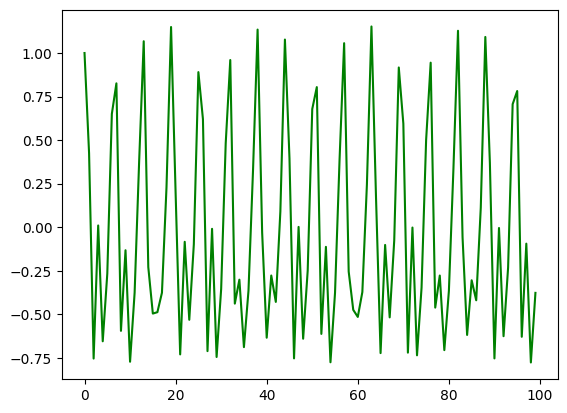

In [55]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot(z_val, 'g-')
plt.show()

<h3>
    Using an optimizer
</h3>

In [56]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate)

In [57]:
training_op = optimizer.minimize(mse)

In [58]:
optimizer = tf.compat.v1.train.MomentumOptimizer(learning_rate=learning_rate, 
                                                 momentum=0.9)

In [59]:
optimizer

<h3>
    Feeding data to the training algorithm
</h3>

In [60]:
A = tf.compat.v1.placeholder(tf.float32, shape=(None, 3))
B = A + 5

In [61]:
with tf.compat.v1.Session() as sess:
    B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})

In [62]:
print(B_val_1)

[[6. 7. 8.]]


In [63]:
print(B_val_2)

[[ 9. 10. 11.]
 [12. 13. 14.]]


In [64]:
X = tf.compat.v1.placeholder(tf.float32, shape=(None, n + 1),
                             name="X")
y = tf.compat.v1.placeholder(tf.float32, shape=(None, 1), name="y")

In [65]:
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [68]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = housing_data_bias[indices] 
    y_batch = housing.target.reshape(-1, 1)[indices] 
    return X_batch, y_batch

In [69]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    b_t = []
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y:y_batch})
        best_theta = theta.eval()
        b_t.append(best_theta)

<h3>
    Saving and restoring models
</h3>

In [72]:
theta = tf.Variable(tf.compat.v1.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")


In [73]:
init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

In [80]:
with tf.compat.v1.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            save_path = saver.save(sess, "my_model.ckpt")
        sess.run(training_op)
    best_theta = theta.eval()
    save_path = saver.save(sess, "my_model_final.ckpt")

In [81]:
with tf.compat.v1.Session() as sess:
    saver.restore(sess, "my_model_final.ckpt")
    best_theta_restored = theta.eval()

INFO:tensorflow:Restoring parameters from my_model_final.ckpt


In [83]:
saver = tf.compat.v1.train.Saver({"weights": theta})

In [84]:
saver

<h3>
    Visualizing Graph and Training Curves using Tensorboard
</h3>

In [85]:
from datetime import datetime

In [86]:
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [87]:
logdir

'tf_logs/run-20240224065306/'

In [89]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.compat.v1.summary.FileWriter(logdir, tf.compat.v1.get_default_graph())

In [90]:
mse_summary

<tf.Tensor 'MSE_2/write_summary/Const:0' shape=() dtype=bool>

In [91]:
file_writer

In [93]:
import os
os.listdir(root_logdir)

['run-20240224065306']

In [95]:
os.listdir(logdir)

['events.out.tfevents.1708757711.Chriss-MacBook-Pro.local']

In [103]:
def make_log_subdir(run_id=None):
    if run_id is None:
        run_id = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    return "{}/run-{}/".format(root_logdir, run_id)

In [104]:
file_writer.close()

In [105]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [106]:
def save_graph(graph=None, run_id=None):
    if graph is None:
        graph = tf.compat.v1.get_default_graph()
    logdir = make_log_subdir(run_id)
    file_writer = tf.compat.v1.summary.FileWriter(logdir, graph=graph)
    file_writer.close()
    return logdir

In [107]:
save_graph()

'tf_logs/run-20240224070829/'

In [111]:
%tensorboard --logdir {root_logdir}



Reusing TensorBoard on port 6006 (pid 1584), started 0:01:48 ago. (Use '!kill 1584' to kill it.)

In [109]:
pip install -U tensorboard-plugin-profile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 6.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.
